In [38]:
import pandas as pd 
from sklearn.manifold import TSNE
import ast
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import json

In [39]:
def tsne_plot(emb, color_map, labels, n_comp=2):
    low_emb = TSNE(n_components=2).fit_transform(emb)
    plt.scatter(low_emb[:,0], low_emb[:,1], c = [color_map[y] for y in labels])
    plt.show()

## Visualizing doc2vec

In [40]:
doc2vec_dat = pd.read_csv('./data/embedded_doc2vec_bbc.csv', header =0, names=['text','label','embedding'], converters={"embedding": lambda x: [float(y) for y in (x.strip("[]").split(", "))]})
doc2vec_emb = doc2vec_dat.embedding.values
labels = doc2vec_dat.label.values
color_map = { 'business':'red', 'entertainment':'green', 'politics':'blue', 'sport':'yellow','tech':'pink'}
en = { 'business':0, 'entertainment':1, 'politics':2, 'sport':3,'tech':4}
encoded_label = [en[y] for y in labels]

In [ ]:
tsne_plot(doc2vec_emb.tolist(), color_map, labels)

In [35]:
model = KNeighborsClassifier()
cv_doc2vec = cross_validate(model, doc2vec_emb.tolist(), encoded_label, cv=3)
print("Doc2Vec classification performance : \n", cv_doc2vec)

Doc2Vec classification performance : 
 {'fit_time': array([0.02746201, 0.01988912, 0.02018881]), 'score_time': array([0.35674906, 0.35498595, 0.35026312]), 'test_score': array([0.92059219, 0.89622642, 0.91486486])}


# Bayesian Paragraph vectors

In [41]:
import torch

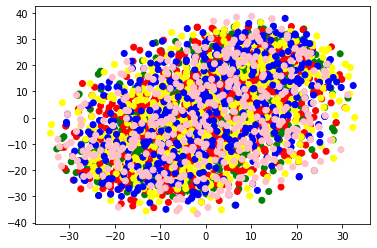

In [42]:
d_i = torch.load('di')
tsne_plot(d_i, color_map, labels)

In [43]:
cv_bpv = cross_validate(model, d_i.tolist(), encoded_label, cv=3)
print("BPV classification performance : \n", cv_bpv)

BPV classification performance : 
 {'fit_time': array([0.01393795, 0.01188397, 0.0111208 ]), 'score_time': array([0.25593495, 0.18306494, 0.18277311]), 'test_score': array([0.21130552, 0.22506739, 0.19459459])}
